In [37]:
import sys
import os
import logging

import pandas as pd

msg_format = "%(asctime)s|%(levelname)s|%(filename)s:%(lineno)d| %(message)s"
date_format = "%d-%b-%y %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=msg_format, datefmt=date_format, stream=sys.stdout)

pwd = os.getcwd()
module_path = f"{pwd}\..\src"
sys.path.insert(0, module_path)

from datetime import datetime
from hostelprices.scrape_web import ScrapeWeb
from hostelprices.utils import Utils
from hostelprices.database import Database

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
client_id = Utils.fromConfig('mongo_client')
data_base_name = Utils.fromConfig('data_base_name')
collection_name = "main_coll-dev-12_14_2022-15_07"

DB = Database(
    client_id=client_id, data_base_name=data_base_name, collection_name=collection_name
    )

In [54]:
coll_name = 'main_coll-main-12_15_2022-14_14'
('12_15_2022' in coll_name) or ('12_14_2022' in coll_name) or (not '2022' in coll_name) or ('dev' in coll_name)

True

In [58]:
coll_names = DB.db.list_collection_names()
coll_selection = []
for coll_name in coll_names:
    if not (('12_15_2022' in coll_name) or ('12_14_2022' in coll_name) or (not '2022' in coll_name) or ('dev' in coll_name)):
        coll_selection.append(coll_name)

coll_selection

['main_coll-main-12_16_2022-06_18',
 'main_coll-main-12_18_2022-20_18',
 'main_coll-main-12_16_2022-06_39',
 'main_coll-main-12_16_2022-05_13',
 'main_coll-main-12_17_2022-08_22',
 'main_coll-main-12_19_2022-08_24',
 'main_coll-main-12_16_2022-20_19',
 'main_coll-main-12_16_2022-03_16',
 'main_coll-main-12_16_2022-03_36',
 'main_coll-main-12_16_2022-01_12',
 'main_coll-main-12_16_2022-04_39',
 'main_coll-main-12_16_2022-02_47',
 'main_coll-main-12_16_2022-07_36',
 'main_coll-main-12_17_2022-20_17',
 'main_coll-main-12_16_2022-04_18',
 'main_coll-main-12_16_2022-08_18',
 'main_coll-main-12_16_2022-02_23',
 'main_coll-main-12_18_2022-08_22',
 'main_coll-main-12_16_2022-07_13',
 'main_coll-main-12_19_2022-20_21',
 'main_coll-main-12_20_2022-08_24']

In [59]:

DB_list = []
for coll_name in coll_selection:
    DB = Database(
        client_id=client_id, data_base_name=data_base_name, collection_name=coll_name
        )
    DB_list.append(DB)
    df = DB.getPandasDf()
    

In [60]:
DB_df_list = []
for DB in DB_list:
    df = DB.getPandasDf()
    df["collection"] = DB.collection_name
    DB_df_list.append(df)

In [61]:
df_all = pd.concat(DB_df_list)
df_all

,_id,price (EUR),rating,distance (km),city,date_from,duration (days),request_time,collection
0,639c0e0fa4c6fbdb623b9b34,29.187459,9.7,0.5,Lisbon,2023-02-13,2,2022-12-16 06:19:58.789,main_coll-main-12_16_2022-06_18
1,639c0e0fa4c6fbdb623b9b35,24.479804,9.7,0.4,Lisbon,2023-02-13,2,2022-12-16 06:19:58.789,main_coll-main-12_16_2022-06_18
2,639c0e0fa4c6fbdb623b9b36,2.120000,9.3,1.3,Lisbon,2023-02-13,2,2022-12-16 06:19:58.789,main_coll-main-12_16_2022-06_18
3,639c0e0fa4c6fbdb623b9b37,0.860000,9.2,0.5,Lisbon,2023-02-13,2,2022-12-16 06:19:58.789,main_coll-main-12_16_2022-06_18
4,639c0e0fa4c6fbdb623b9b38,24.479804,9.7,0.3,Lisbon,2023-02-13,2,2022-12-16 06:19:58.789,main_coll-main-12_16_2022-06_18
...,...,...,...,...,...,...,...,...,...
23,63a1715f2d5abd8a01885798,17.927911,8.8,0.3,Lisbon,2023-02-13,2,2022-12-20 08:25:02.390,main_coll-main-12_20_2022-08_24
24,63a1715f2d5abd8a01885799,7.860000,8.7,1.8,Lisbon,2023-02-13,2,2022-12-20 08:25:02.390,main_coll-main-12_20_2022-08_24
25,63a1715f2d5abd8a0188579a,21.702208,9.1,0.5,Lisbon,2023-02-13,2,2022-12-20 08:25:02.390,main_coll-main-12_20_2022-08_24
26,63a1715f2d5abd8a0188579b,23.589356,8.2,2.2,Lisbon,2023-02-13,2,2022-12-20 08:25:02.390,main_coll-main-12_20_2022-08_24


In [62]:
df_all.city.value_counts

<bound method IndexOpsMixin.value_counts of 0     Lisbon
1     Lisbon
2     Lisbon
3     Lisbon
4     Lisbon
       ...  
23    Lisbon
24    Lisbon
25    Lisbon
26    Lisbon
27    Lisbon
Name: city, Length: 588, dtype: object>

In [63]:
df_all["rating_per_price"] = df_all["rating"] / df_all["price (EUR)"]

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

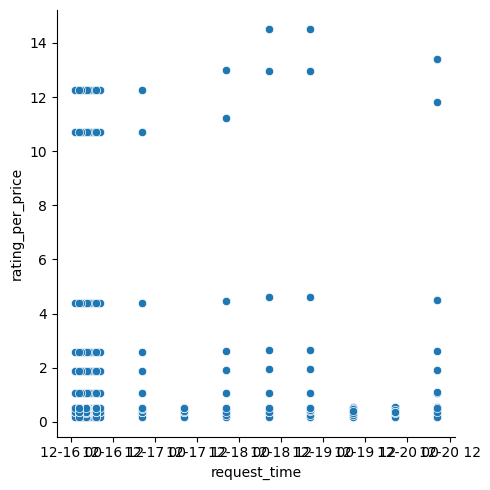

In [65]:
sns.relplot(
    data=df_all,    
    x='request_time',
    y='rating_per_price',
    )
plt.show()